# Segmenting and Clustering Neighborhoods in NYC, USA and Toronto, Canada to effectively predict the best possible location for the new store of Melaleuca Inc. 

Before we can built a predictive model, we basically wanted to perform an overall analysis of the two cities (NYC and Toronto) to get the general idea of the population, average income, weather, criminal offenses and the overall economy of the cities. After all before opening a new store in those cities,  we will have to examine the surrounding and understand the businesses and people living in those areas. Once we are familiar with surrounding neighborhoods of NYC and Toronto the next step will be to start utilizing the Foursquare API to explore the neighborhoods and segment them and after analyzing and modeling the data we will be able to predict the best location to open new store.

Let's download all the dependencies first that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Matplotlib version:  3.0.2
Libraries imported.


## Exploring and Analyzing the New York City, USA

#### Analyzing NYC Population 

In [2]:
NYC_population = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_New_York_City")

Lets look at the data first that we pulled from the wikipedia page.

In [3]:
NYC_population[0].head()

New York City's five boroughsvte                               \
                      Jurisdiction                   Population   
                           Borough    County Estimate (2017)[1]   
0                        The Bronx     Bronx            1471160   
1                         Brooklyn     Kings            2648771   
2                        Manhattan  New York            1664727   
3                           Queens    Queens            2358582   
4                    Staten Island  Richmond             479458   

                                                                \
  Gross Domestic Product                    Land area            
        billions(US$)[2] per capita(US$) square miles squarekm   
0                 28.787           19570        42.10   109.04   
1                 63.303           23900        70.82   183.42   
2                629.682          378250        22.83    59.13   
3                 73.842           31310       108.53   281.09   
4                 11.249           23460        58.37   151.18   

                                    
           Density                  
  persons / sq. mi persons /sq. km  
0            34653           13231  
1            37137           14649  
2            72033           27826  
3            21460            8354  
4             8112            3132

Lets clean the data and pull the relevant information of population by boroughs.

In [4]:
df = NYC_population[0]
df = df.drop(df.columns[[1, 3, 4, 5, 6, 7, 8]], axis=1)
df.columns =['Boroughs', 'Population'] 
df.drop(df.index[[5,6,7]], inplace=True)
df

,Boroughs,Population
0,The Bronx,1471160
1,Brooklyn,2648771
2,Manhattan,1664727
3,Queens,2358582
4,Staten Island,479458


Now we will plot the data that will give us a better idea of population of each boroughs in New York City.

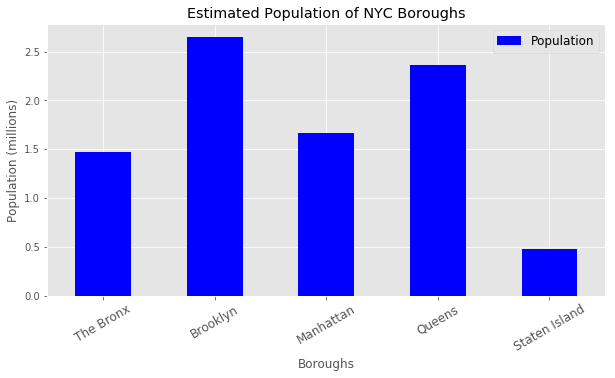

In [5]:
df['Population'] = df['Population'].astype(int)
df.dtypes
df_top5 = df['Population'] / 10**6
df_top5.plot(kind='Bar', x=df['Boroughs'], y=df['Population'], stacked=False, figsize=(10, 5), color='Blue'  )
index = np.arange(len(df['Boroughs']))
plt.title('Estimated Population of NYC Boroughs')
plt.ylabel('Population (millions)')
plt.xlabel('Boroughs')
plt.xticks(index, df['Boroughs'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

By plotting the graph of population of different boroughs we can see that the population of Brooklyn is much higher as compare to other boroughs. 

#### Analyzing NYC House Hold Income

In [6]:
NYC_Income = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_New_York_City")

Let's look at the data first that we pulled from the wikipedia page.

In [7]:
NYC_Income[6].head()

,Area,MedianHouse-holdIncome,MeanHouse-holdIncome,Percent-age in Poverty
0,The Bronx,"$34,156","$46,298",27.1%
1,Brooklyn,"$41,406","$60,020",21.9%
2,Manhattan,"$64,217","$121,549",17.6%
3,Queens,"$53,171","$67,027",12.0%
4,Staten Island,"$66,985","$81,498",9.8%


Lets clean the data and pull the relevant information of Median House Hold Income in each boroughs.

In [8]:
df_income = NYC_Income[6]
df_income = df_income.drop(df_income.columns[[2, 3]], axis=1)
df_income.drop(df_income.index[[5,6,7]], inplace=True)
df_income['MedianHouse-holdIncome'] = df_income['MedianHouse-holdIncome'].replace('[\$,]', '', regex=True).astype(float).astype(int)
df_income

,Area,MedianHouse-holdIncome
0,The Bronx,34156
1,Brooklyn,41406
2,Manhattan,64217
3,Queens,53171
4,Staten Island,66985


Now, we will plot the data that will give us a better idea of Median House Hold Income of each boroughs in New York City.

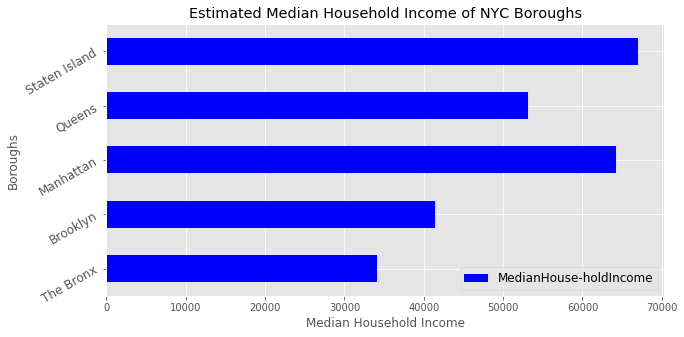

In [9]:
df_income.plot.barh(figsize=(10, 5), color='Blue')
index = np.arange(len(df_income['Area']))
plt.title('Estimated Median Household Income of NYC Boroughs')
plt.ylabel('Boroughs')
plt.xlabel('Median Household Income')
plt.yticks(index, df_income['Area'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

By plotting the graph of Median House Hold Income of different boroughs.We can see that the Median Household Income of Staten Island is higher as compare to other boroughs. 

#### Analyzing NYC Economy 

In [10]:
NYC_Economy = pd.read_html("https://en.wikipedia.org/wiki/Economy_of_New_York_City")

Lets look at the data first that we pulled from the wikipedia page.

In [11]:
df_economy = NYC_Economy[1]
df_economy.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,(sort),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NYC rank(2015),State rank(2015),U.S. rank(2015),World rank(2014),Company,Revenues (billions),Employees (worldwide),Industry group
1,1,1,13,41,Verizon Communications,$131.6,177700,Telecommunications
2,2,2,23,61,J.P. Morgan Chase & Co.,$101.0,234598,Commercial Banks
3,3,3,29,86,Citigroup,$88.3,231000,Commercial Banks
4,(a),4,31,82,"IBM (Armonk, NY)",$82.5,411798,Information Technology Services


Extract the relevant column from the Raw data that we pulled from wikipedia and rename it.

In [12]:
df_economy = df_economy.drop(df_economy.columns[[0,1,2,3,6,7]], axis=1)
df_economy.drop(df_economy.index[[26]], inplace=True)
df_economy.columns = df_economy.iloc[0]
df_economy.drop(df_economy.index[0], inplace=True)
df_economy = df_economy.head()
df_economy = df_economy.reset_index(drop=True)
df_economy[['Revenues (billions)']] = df_economy[['Revenues (billions)']].replace('[\$,]','',regex=True).astype(float)
df_economy

,Company,Revenues (billions)
0,Verizon Communications,131.6
1,J.P. Morgan Chase & Co.,101.0
2,Citigroup,88.3
3,"IBM (Armonk, NY)",82.5
4,MetLife,70.0


Lets visualize the data to analyze the revenue of major companies in NYC.

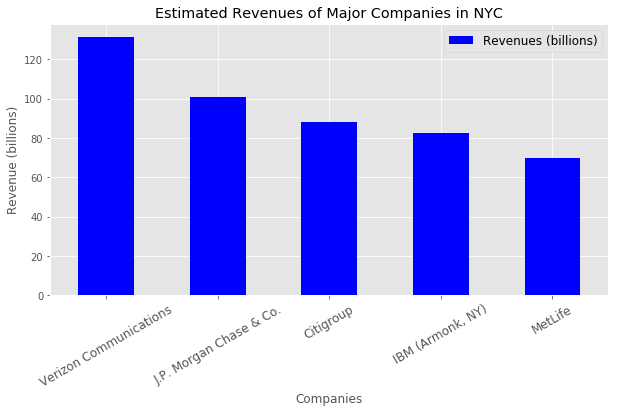

In [13]:
df_economy.plot.bar( figsize=(10, 5), color='Blue'  )
index = np.arange(len(df_economy['Company']))
plt.title('Estimated Revenues of Major Companies in NYC')
plt.ylabel('Revenue (billions)')
plt.xlabel('Companies')
plt.xticks(index, df_economy['Company'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

As, we can see from the data the companies that are headquartered in New York City has revenues around 100 Billion. For the sake of assessment we analyzed the top 5 companies based in new york that will give us the assesment of how the economy of the city is and gives us a very good idea that the city is booming with alot of opportunites for business and career for growth.  

#### Analyzing NYC Weather Data

The weather data for NYC was collected from Kaggle. We can access the data using the link: https://www.kaggle.com/mathijs/weather-data-in-new-york-city-2016. The data is available in csv format so we had to do some data pre-processing before we could analyze it. In order to do that we loaded the csv file to IBM DB2 in cloud and retrieved the data from there. 

In [14]:
import ibm_db

In [15]:
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"           
dsn_port = "50000"                  
dsn_protocol = "TCPIP"            
dsn_uid = "spw42978"                
dsn_pwd = "p@2mhzhsh4mvqqkz"   

In [16]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  spw42978 on host:  dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net


In [17]:
import ibm_db_dbi
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [18]:
#query statement to retrieve all rows in GEOSPATIAL_COORDINATES table
selectQuery = "select * from NYC_WEATHER_DATA"
#retrieve the query results into a pandas dataframe
df_weather = pd.read_sql(selectQuery, pconn)

Let's look at the data first that we pulled from NYC Weather data.

In [19]:
df_weather.head()

,date,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth
0,2016-01-01,42,34,38.0,0,0,0
1,2016-01-02,40,32,36.0,0,0,0
2,2016-01-03,45,35,40.0,0,0,0
3,2016-01-04,36,14,25.0,0,0,0
4,2016-01-05,29,11,20.0,0,0,0


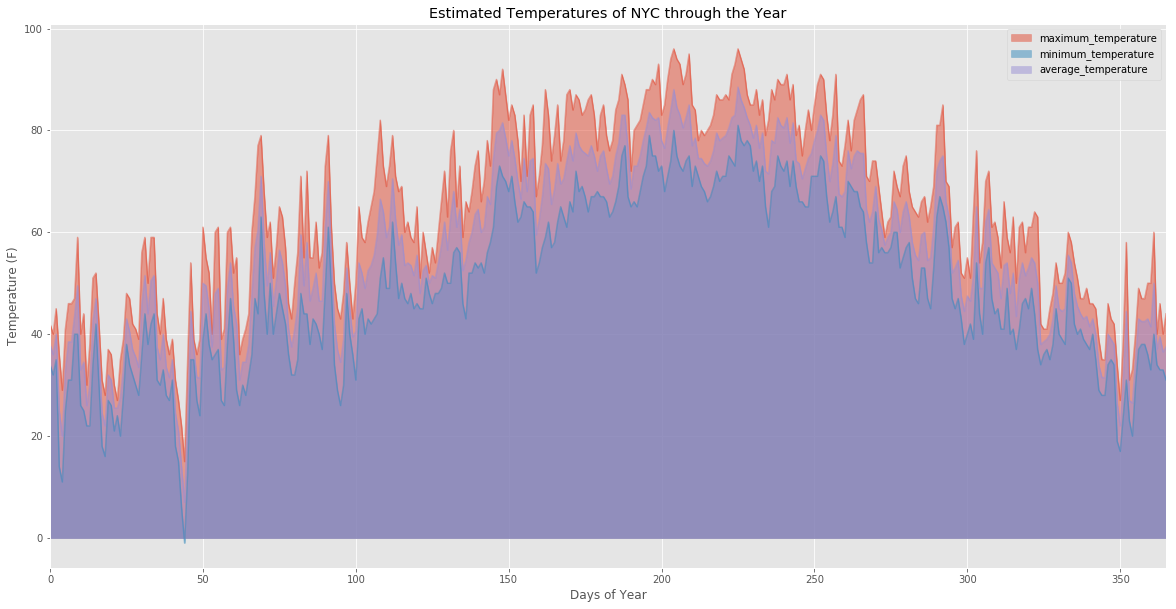

In [20]:
df_weather.plot(kind='area', stacked=False, figsize=(20, 10) )
plt.title('Estimated Temperatures of NYC through the Year')
plt.ylabel('Temperature (F)')
plt.xlabel('Days of Year')
plt.show()

Looking at the graph plotted of NYC weather we can see that the temperature drops in winter down to between 20-30 degrees(F) in winter and it reaches to almost 80-90 degrees(F) in the summers.

#### Analyzing NYC Crimes Data

The crime data for NYC was collected from Kaggle. We can access the data using the link: https://www.kaggle.com/adamschroeder/crimes-new-york-city. The data is available in csv format so we had to do some data pre-processing before we could analyze it. In order to do that we loaded the csv file to IBM DB2 in cloud and retreieve the data from there.

In [21]:
selectQuery = "select * from NYC_COMPLAINTS_DATA"
pdf = pd.read_sql(selectQuery, pconn)

In [22]:
pdf.head()

,RPT_DT,LAW_CAT_CD,BORO_NM
0,2015-01-01,MISDEMEANOR,BRONX
1,2015-01-01,FELONY,BRONX
2,2015-01-01,VIOLATION,BROOKLYN
3,2015-01-01,FELONY,BROOKLYN
4,2015-01-01,FELONY,QUEENS


In [23]:
pdf_grp = pdf.groupby(['BORO_NM']).size().reset_index(name='Compaints_Count')

In [24]:
pdf_grp['Compaints_Count'] = pdf_grp['Compaints_Count'].astype(int)

pdf_grp

,BORO_NM,Compaints_Count
0,BRONX,104999
1,BROOKLYN,143262
2,MANHATTAN,113118
3,QUEENS,95055
4,STATEN ISLAND,22144


Lets look at the data first that we pulled from NYC_COMPLAINTS_DATA table.

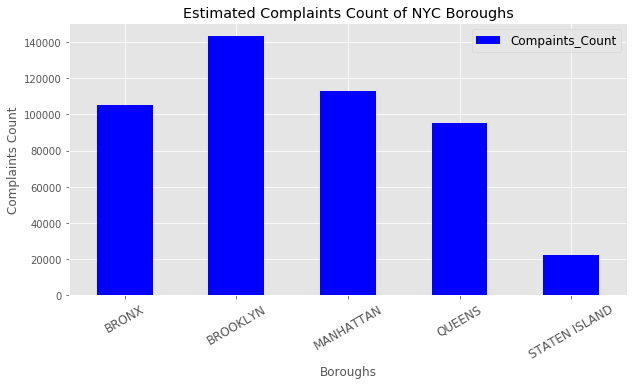

In [25]:
pdf_grp.plot.bar( figsize=(10, 5), color='Blue'  )
index = np.arange(len(pdf_grp['BORO_NM']))
plt.title('Estimated Complaints Count of NYC Boroughs')
plt.ylabel('Complaints Count')
plt.xlabel('Boroughs')
plt.xticks(index, pdf_grp['BORO_NM'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

By plotting and analyzig the NYC boroughs crime data, we can see that Brooklyn has highest number of crimes committed in an year as compare to other Boroughs. On other hand staten island has least number of crimes as compared to other boroughs.

## Exploring and Analyzing the Toronto City

#### Analyzing Toronto Population 

In [26]:
t_population = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods")

Let's look at the data first that we pulled from the wikipedia page.

In [27]:
t_population[1].head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


In [28]:
t_pop = t_population[1]
t_pop['Population'] = t_pop['Population'].astype(int)
t_pop = t_pop.drop(t_pop.columns[[2, 4, 5, 6, 8, 9,10, 11 ,12]], axis=1)
t_pop.drop(t_pop.index[[64]], inplace=True)
t_pop['Average Income'] = t_pop['Average Income'].astype(float)
t_pop.dtypes
t_pop = t_pop.groupby(['FM']).agg({'Population': np.sum, 'Average Income': np.mean})
t_pop = t_pop.reset_index()
t_pop.set_index(['FM'], append=True)

,,Population,Average Income
,FM,,
0,E,313772,43056.200000
1,EY,112054,54604.000000
2,NY,621068,54389.925000
3,OCoT,619004,58609.555556
4,S,600715,30518.793103
5,Y,143255,38124.000000


In [29]:
t_pop.loc[0, 'Boroughs'] = 'Etobicoke'
t_pop.loc[1, 'Boroughs'] = 'East York'
t_pop.loc[2, 'Boroughs'] = 'North York'
t_pop.loc[3, 'Boroughs'] = ' Old City of Toronto'
t_pop.loc[4, 'Boroughs'] = 'Scarborough'
t_pop.loc[5, 'Boroughs'] = 'York'
cols = t_pop.columns.tolist()
cols = cols[-1:] + cols[:-1]
t_pop = t_pop[cols]
t_pop
t_pop = t_pop.drop(t_pop.columns[[1, 3]], axis=1)

Lets plot the data so that we can analyze the population of each boroughs in Toronto.

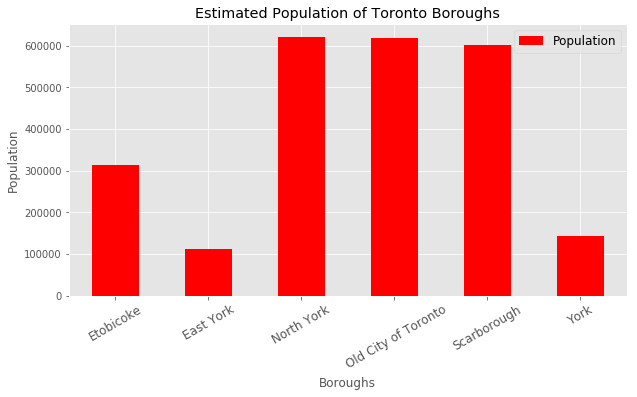

In [30]:
t_pop .plot.bar( figsize=(10, 5), color='Red')
index = np.arange(len(t_pop ['Boroughs']))
plt.title('Estimated Population of Toronto Boroughs')
plt.ylabel('Population')
plt.xlabel('Boroughs')
plt.xticks(index, t_pop['Boroughs'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

By plotting the graph of population of different boroughs in Toronto we can see that the population of East York and Old City of Toronto Boroughs is higher as compare to other boroughs. 

#### Analyzing Toronto Income 

In [31]:
t_income = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods")

Let's look at the data first that we pulled from the wikipedia page.

In [32]:
t_income[1].head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


In [33]:
t_income = t_income[1]
t_income = t_income.drop(t_income.columns[[2, 4, 5, 6, 8, 9,10, 11 ,12]], axis=1)
t_income.drop(t_income.index[[64]], inplace=True)
t_income['Average Income'] = t_income['Average Income'].astype(float)
t_income.dtypes
t_income = t_income.groupby(['FM']).agg({'Population': np.sum, 'Average Income': np.mean})
t_income = t_income.reset_index()
t_income.set_index(['FM'], append=True)

,,Population,Average Income
,FM,,
0,E,313772,43056.200000
1,EY,112054,54604.000000
2,NY,621068,54389.925000
3,OCoT,619004,58609.555556
4,S,600715,30518.793103
5,Y,143255,38124.000000


In [34]:
t_income.loc[0, 'Boroughs'] = 'Etobicoke'
t_income.loc[1, 'Boroughs'] = 'East York'
t_income.loc[2, 'Boroughs'] = 'North York'
t_income.loc[3, 'Boroughs'] = ' Old City of Toronto'
t_income.loc[4, 'Boroughs'] = 'Scarborough'
t_income.loc[5, 'Boroughs'] = 'York'
cols = t_income.columns.tolist()
cols = cols[-1:] + cols[:-1]
t_income = t_income[cols]

In [35]:
t_inc = t_income.drop(t_income.columns[[1, 2]], axis=1)
t_inc

,Boroughs,Average Income
0,Etobicoke,43056.200000
1,East York,54604.000000
2,North York,54389.925000
3,Old City of Toronto,58609.555556
4,Scarborough,30518.793103
5,York,38124.000000


Lets look at the data first that we pulled from wikipedia page.

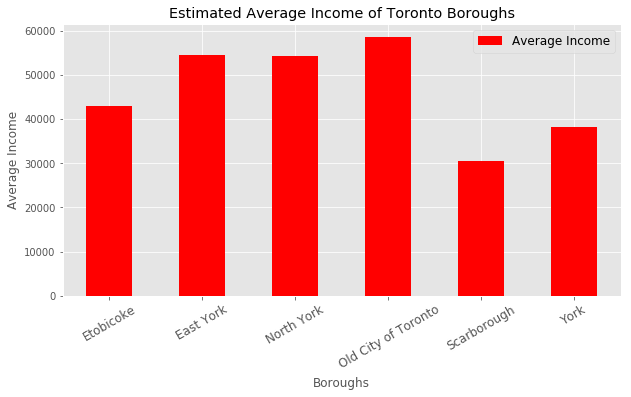

In [36]:
t_inc.plot.bar( figsize=(10, 5), color='Red'  )
index = np.arange(len(t_inc['Boroughs']))
plt.title('Estimated Average Income of Toronto Boroughs')
plt.ylabel('Average Income')
plt.xlabel('Boroughs')
plt.xticks(index, t_inc['Boroughs'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

By plotting the graph of Average Income in different boroughs we can see that the Average Household Income of Old City of Toronto is higher as compare to other boroughs. 

#### Analyzing Toronto Weather Data

In [37]:
#query statement to retrieve all rows in GEOSPATIAL_COORDINATES table
selectQuery = "select * from TORONTO_WEATHER_DATA"

#retrieve the query results into a pandas dataframe
t_weather = pd.read_sql(selectQuery, pconn)

Let's look at the data first that we pulled from the DB2 table.

In [38]:
t_weather.rename(columns={'Avg_Temp_F_':'Average Temperature'},inplace=True)
t_weather.head()

,date,Average Temperature
0,2016-01-01,30
1,2016-01-02,31
2,2016-01-03,26
3,2016-01-04,10
4,2016-01-05,18


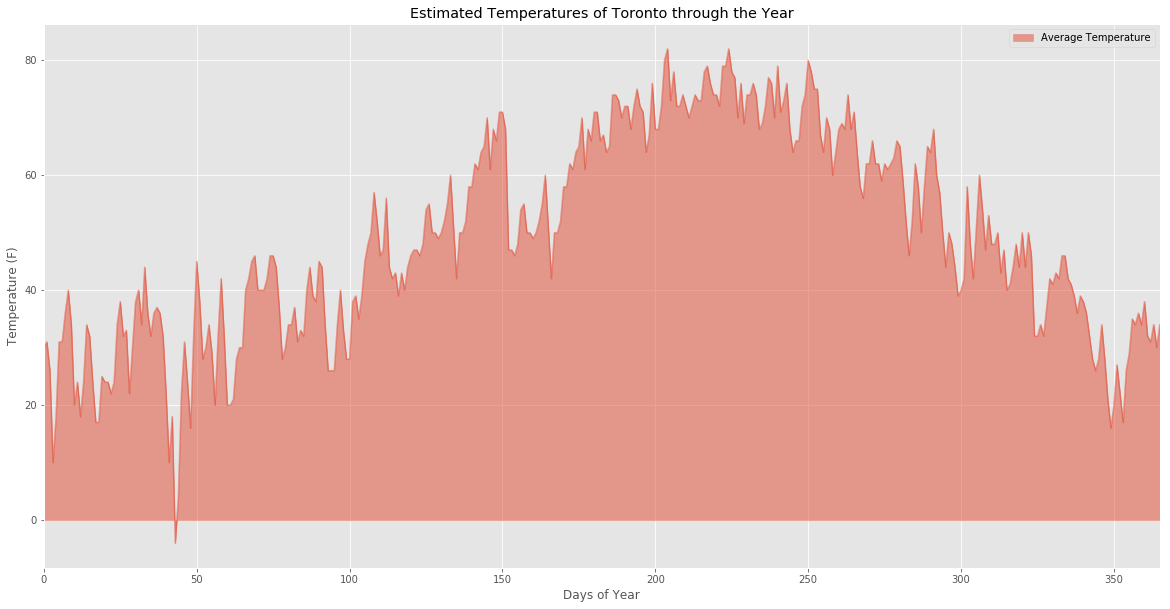

In [39]:
t_weather.plot(kind='area', stacked=False, figsize=(20, 10) )
plt.title('Estimated Temperatures of Toronto through the Year')
plt.ylabel('Temperature (F)')
plt.xlabel('Days of Year')
plt.show()

#### Analyzing Toronto Crime Data

In [40]:
#query statement to retrieve all rows in GEOSPATIAL_COORDINATES table
selectQuery = "select * from TORONTO_CRIME_DATA"

#retrieve the query results into a pandas dataframe
t_crime = pd.read_sql(selectQuery, pconn)

In [41]:
t_crime.head()

,Neighbourhood,Total_2018_Statistics
0,Yonge-St.Clair,41.0
1,York University Heights,608.0
2,Lansing-Westgate,141.0
3,Yorkdale-Glen Park,356.0
4,Stonegate-Queensway,185.0


In [42]:
t_crime.rename(columns={'Total_2018_Statistics':'Crime_Data'},inplace=True)

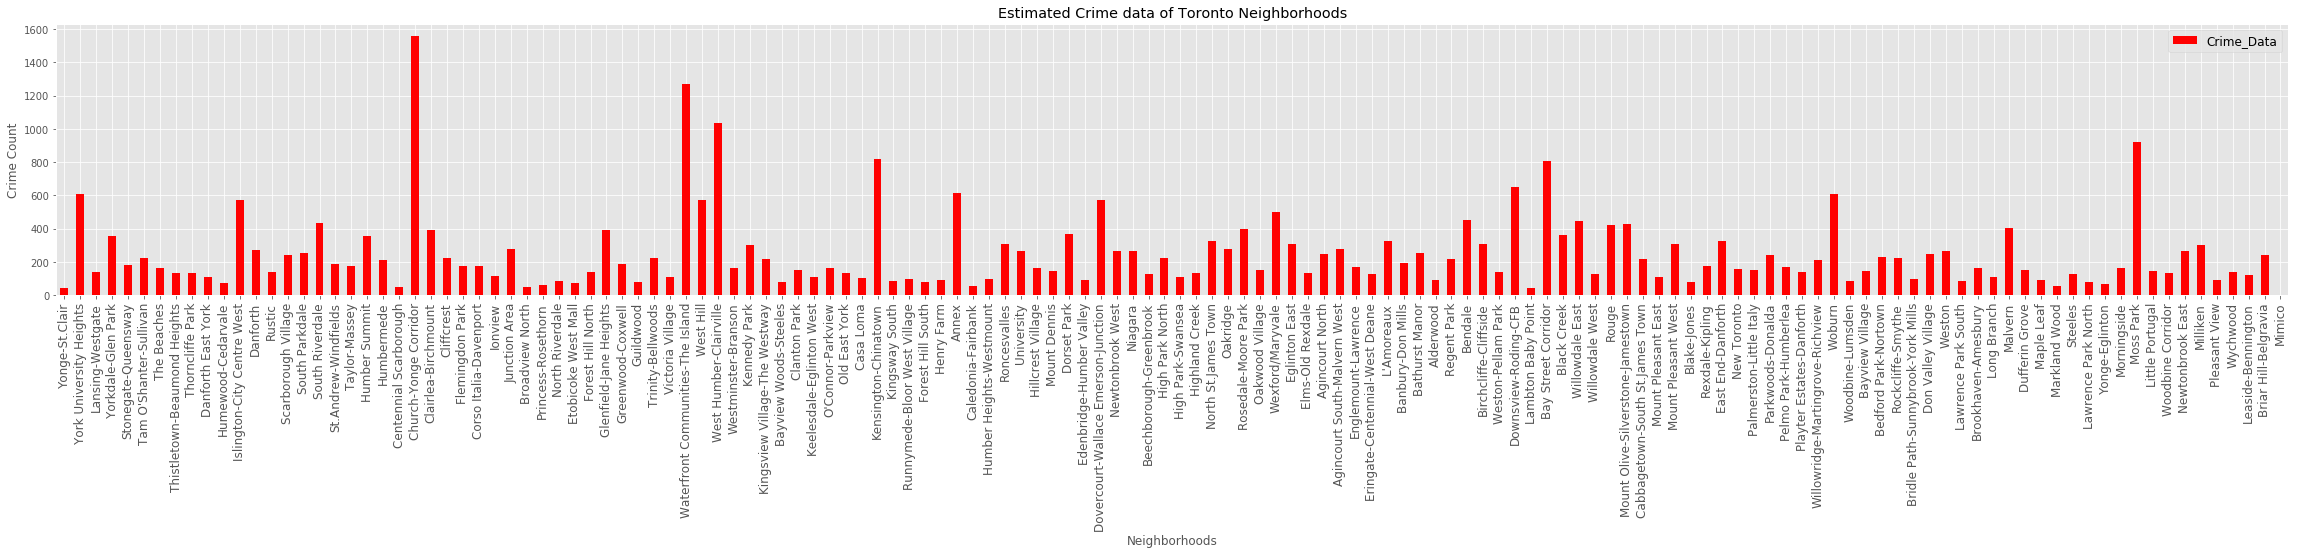

In [43]:
t_crime.plot.bar( figsize=(40, 5), color='Red'  )
index = np.arange(len(t_crime['Neighbourhood']))
plt.title('Estimated Crime data of Toronto Neighborhoods')
plt.ylabel('Crime Count')
plt.xlabel('Neighborhoods')
plt.xticks(index, t_crime['Neighbourhood'], fontsize=12, rotation=90)
plt.legend(loc='best',fontsize=12)
plt.show()

By plotting and analyzing the toronto crime data we can see that church-yonge corridor are has highest number of crimes committed in an year as compare to other Boroughs.

#### Analyzing Toronto Economics

In order to Analyze the economics of toronto we will use the canadian business data website link: https://www.canadianbusiness.com/lists-and-rankings/growth-500/2018-ranking-g500/. This will give us the top 500 businesses operating in canada and then we will scrap the data to pick up the toronto business, by looking at the value of those businesses we will get an idea of how the economics of the city looks like. 

Let's pull the data from the canadian business website first and check how it looks like.

In [44]:
t_eco = pd.read_html("https://www.canadianbusiness.com/lists-and-rankings/growth-500/2018-ranking-g500/")

In [45]:
t_eco[0].head()

,Rank,Company,5-year growth (%),2017 revenue ($mil),Industry,City,Province,"Employees, 2017 (full-time equivalent)"
0,1,Article,56581,100-200,Retail,Vancouver,B.C.,103
1,2,EdenPark,9656,10-20,Financial Services,Toronto,Ont.,70
2,3,Prodigy Game,9230,10-20,Software,Burlington,Ont.,107
3,4,SendtoNews,8388,10-20†,Marketing & Media,Victoria,B.C.,27
4,5,Maropost,7855,20-50,Software,Toronto,Ont.,153


Now, we will take only the businesses that are based in toronto.

In [46]:
indexNames = t_eco[0][ t_eco[0]['City'] != 'Toronto' ].index
t_eco[0].drop(indexNames , inplace=True)
t_eco[0].reset_index(inplace=True)
t_eco=t_eco[0].drop('index', axis=1)
t_eco.shape

(112, 8)

We can see from the data that out of 500 top businesses in canada 112 businesses are based in toronto. 

In [47]:
t_eco.head()

,Rank,Company,5-year growth (%),2017 revenue ($mil),Industry,City,Province,"Employees, 2017 (full-time equivalent)"
0,2,EdenPark,9656,10-20,Financial Services,Toronto,Ont.,70
1,5,Maropost,7855,20-50,Software,Toronto,Ont.,153
2,6,Gillam Group,7215,50-100,Construction,Toronto,Ont.,89
3,7,Cluep,7092,10-20,Marketing & Media,Toronto,Ont.,25
4,8,dbrand,6523,10-20,Retail,Toronto,Ont.,54


Let's clean the data and pickup only the top 10 businesses of toronto and their growth.

In [48]:
t_eco = t_eco.drop(t_eco.columns[[0,3,4,5,6,7]], axis=1)
t_eco = t_eco[:10] #keep top 3
t_eco

,Company,5-year growth (%)
0,EdenPark,9656
1,Maropost,7855
2,Gillam Group,7215
3,Cluep,7092
4,dbrand,6523
5,Prodigy Ventures,5970
6,Wave,5914
7,LowestRates.ca,4905
8,GreenSpace Brands,4071
9,TouchBistro,2917


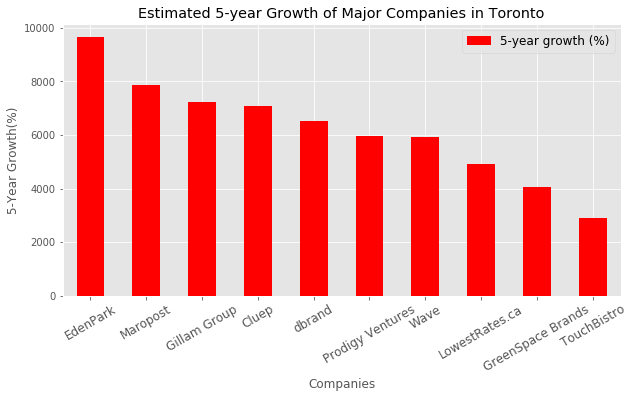

In [49]:
t_eco.plot.bar( figsize=(10, 5), color='Red'  )
index = np.arange(len(t_eco['Company']))
plt.title('Estimated 5-year Growth of Major Companies in Toronto')
plt.ylabel('5-Year Growth(%)')
plt.xlabel('Companies')
plt.xticks(index, t_eco['Company'], fontsize=12, rotation=30)
plt.legend(loc='best',fontsize=12)
plt.show()

As, we can see from the data in the furtune top 500 businesses of canada, 112 are from toronto and they show a very high growth where some of the businesses like Eden park and Maropost are showing almost 10,000% growth. This means that the economy is booming and in the future there will alot more opportunites. 

## Segmenting and Clustering of New York Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. Here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

We can simply run a `wget` command and access the data.

In [50]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Next, let's load the data.

In [51]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

The relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [52]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [53]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [54]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [55]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [56]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [57]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [58]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [59]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


#### Create a map of New York with neighborhoods superimposed on top.

In [62]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [63]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [64]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


As we did with all of New York City, let's visualize Manhattan the neighborhoods in it.

In [65]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [66]:
CLIENT_ID = '40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI' # your Foursquare ID
CLIENT_SECRET = 'T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI: ' + CLIENT_ID)
print('T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY:' + CLIENT_SECRET)

Your credentails:
40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI: 40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI
T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY:T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [67]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [68]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [69]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI&client_secret=T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

Send the GET request and examine the results

In [72]:
results = requests.get(url).json()

Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [73]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [74]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [75]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


<a id='item2'></a>

## Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [76]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [77]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe

In [78]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3326, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


Let's check how many venues were returned for each neighborhood

In [79]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,98,98,98,98,98,98
Carnegie Hill,100,100,100,100,100,100
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,44,44,44,44,44,44
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [80]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 330 uniques categories.


<a id='item3'></a>

## Analyze Each Neighborhood

In [89]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack Place,Soba Restaurant,Social Club,Soup Place,Sout

And let's examine the new dataframe size.

In [90]:
manhattan_onehot.shape

(3326, 331)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [91]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack Place,Soba Restaurant,Social Club,Soup Place,Sout

#### Let's confirm the new size

In [92]:
manhattan_grouped.shape

(40, 331)

#### Let's print each neighborhood along with the top 5 most common venues

In [93]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0         Coffee Shop  0.07
1                Park  0.07
2               Hotel  0.05
3                 Gym  0.04
4  Italian Restaurant  0.03


----Carnegie Hill----
            venue  freq
0     Pizza Place  0.06
1     Coffee Shop  0.05
2             Bar  0.04
3  Cosmetics Shop  0.04
4            Café  0.04


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1       Cosmetics Shop  0.07
2   Chinese Restaurant  0.05
3  American Restaurant  0.05
4   Seafood Restaurant  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.07
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.10
1     Dim Sum Restaurant  0.04
2    American Restaurant  0.04
3           Cocktail Bar  0.04
4  Vietnamese Restaurant  0.04


----Civic Center----
                  venue 

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Park,Hotel,Gym,Wine Shop,Clothing Store,Italian Restaurant,Shopping Mall,Fountain,Men's Store
1,Carnegie Hill,Pizza Place,Coffee Shop,Bar,Café,Cosmetics Shop,Bookstore,Spa,French Restaurant,Grocery Store,Yoga Studio
2,Central Harlem,African Restaurant,Cosmetics Shop,French Restaurant,American Restaurant,Chinese Restaurant,Art Gallery,Gym / Fitness Center,Seafood Restaurant,Bookstore,Beer Bar
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Hotel,Seafood Restaurant,Theater,American Restaurant,Health & Beauty Service
4,Chinatown,Chinese Restaurant,American Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Cocktail Bar,Noodle House,Hotpot Restaurant,Ice Cream Shop,Bubble Tea Shop,Bar


<a id='item4'></a>

## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [96]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 0, 1, 0, 0, 4, 1, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [97]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Coffee Shop,Discount Store,Sandwich Place,Tennis Stadium,Gym,Big Box Store,Supplement Shop,Shoe Store,Seafood Restaurant,Yoga Studio
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,American Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Cocktail Bar,Noodle House,Hotpot Restaurant,Ice Cream Shop,Bubble Tea Shop,Bar
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Grocery Store,Sandwich Place,Chinese Restaurant,Spanish Restaurant,New American Restaurant,Latin American Restaurant,Gym
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Café,Lounge,Pizza Place,Park,Chinese Restaurant,Restaurant,Spanish Restaurant,Frozen Yogurt Shop,Deli / Bodega
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Mexican Restaurant,Pizza Place,Coffee Shop,Café,Deli / Bodega,Bakery,Cocktail Bar,Sandwich Place,School,Chinese Restaurant


Finally, let's visualize the resulting clusters

In [98]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### 1) Shopping Center Cluster

This  basically looks like a Shopping Center Cluster with mix of shops like boutiques, clothing shops, Bars, restaurants and Cafe. 

In [99]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Coffee Shop,Exhibit,Bakery,Juice Bar,Gym / Fitness Center,Art Gallery,Hotel,Spa,Cocktail Bar
13,Lincoln Square,Theater,Café,Concert Hall,Italian Restaurant,Gym / Fitness Center,Plaza,Opera House,French Restaurant,Performing Arts Venue,Indie Movie Theater
14,Clinton,Theater,Hotel,Gym / Fitness Center,Italian Restaurant,American Restaurant,Wine Shop,Spa,Gym,Food Court,Cocktail Bar
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Hotel,Seafood Restaurant,Theater,American Restaurant,Health & Beauty Service
18,Greenwich Village,Italian Restaurant,Clothing Store,French Restaurant,Sushi Restaurant,Boutique,Café,Seafood Restaurant,Bakery,Indian Restaurant,Sandwich Place
21,Tribeca,Café,Park,Italian Restaurant,Spa,American Restaurant,Boutique,Wine Bar,Wine Shop,Gym,Greek Restaurant
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Gastropub,Wine Bar,Jazz Club,Bakery,American Restaurant,French Restaurant,Park
27,Gramercy,Italian Restaurant,Bar,Bagel Shop,Cocktail Bar,Pizza Place,Thai Restaurant,Thrift / Vintage Store,Coffee Shop,Hotel,Grocery Store
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Coffee Shop,Boutique,Gift Shop,Hotel,Rock Club,Mexican Restaurant,American Restaurant
32,Civic Center,Gym / Fitness Center,Bakery,Italian Restaurant,Coffee Shop,French Restaurant,Yoga Studio,Cocktail Bar,Sandwich Place,Park,Sporting Goods Shop


#### 2) Recreational Center Cluster

This cluster looks looks like a more kind of recreational center where there are alot of venues like Spa's, restaurants, hotels, theaters and bars etc. Most of the venues are related to enjoyment and if someone wants to spend quality joyful time. This cluster is best collection of all those activities. 

In [100]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,American Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Cocktail Bar,Noodle House,Hotpot Restaurant,Ice Cream Shop,Bubble Tea Shop,Bar
6,Central Harlem,African Restaurant,Cosmetics Shop,French Restaurant,American Restaurant,Chinese Restaurant,Art Gallery,Gym / Fitness Center,Seafood Restaurant,Bookstore,Beer Bar
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Gym / Fitness Center,Burger Joint,Sporting Goods Shop,Gym,Cycle Studio,Cosmetics Shop
12,Upper West Side,Italian Restaurant,Bar,Vegetarian / Vegan Restaurant,Wine Bar,Mediterranean Restaurant,Burger Joint,Bakery,Coffee Shop,Indian Restaurant,Ice Cream Shop
15,Midtown,Hotel,Clothing Store,Food Truck,Steakhouse,Cocktail Bar,Theater,Bakery,Bookstore,Coffee Shop,Sporting Goods Shop
16,Murray Hill,Hotel,Japanese Restaurant,Coffee Shop,French Restaurant,American Restaurant,Sandwich Place,Italian Restaurant,Bar,Gym,Spa
19,East Village,Bar,Wine Bar,Mexican Restaurant,Ice Cream Shop,Cocktail Bar,Pizza Place,Chinese Restaurant,Coffee Shop,Ramen Restaurant,Vegetarian / Vegan Restaurant
22,Little Italy,Bakery,Café,Salon / Barbershop,Mediterranean Restaurant,Seafood Restaurant,Sandwich Place,Bubble Tea Shop,Chinese Restaurant,Clothing Store,Cocktail Bar
23,Soho,Clothing Store,Boutique,Women's Store,Men's Store,Mediterranean Restaurant,Coffee Shop,Italian Restaurant,Shoe Store,Art Gallery,Yoga Studio
30,Carnegie Hill,Pizza Place,Coffee Shop,Bar,Café,Cosmetics Shop,Bookstore,Spa,French Restaurant,Grocery Store,Yoga Studio


#### 3) Public Visiting Park Cluster

This cluster is named as public visiting park because venues are more related to outdoor activities like Pak, Basketball court, baseball Field and boat or ferry etc. It is the best spot for some one who is interested in outdoor activities. 

In [101]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Playground,Boat or Ferry,Harbor / Marina,German Restaurant,Baseball Field,Cocktail Bar,Coffee Shop,Heliport


#### 4) Tourism Attraction center Cluster

This cluster will be great for tourist to stay and travel around in this area thats why we named it as tourism attraction center. The bridge, metro station and scenic lookout for tourists will be great spots to visit plus this cluster has to offer alot of restaurants, hotels, cafe and theaters etc which makes this cluster a best place for tourists to stay and visit around conveniently. 

In [102]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Fried Chicken Joint,Italian Restaurant,Mexican Restaurant,Park,Seafood Restaurant,Bus Stop,Japanese Curry Restaurant,Bike Trail,Boutique
9,Yorkville,Coffee Shop,Italian Restaurant,Bar,Gym,Pizza Place,Wine Shop,Japanese Restaurant,Diner,Sushi Restaurant,Deli / Bodega
11,Roosevelt Island,Park,Sandwich Place,Playground,Bubble Tea Shop,Supermarket,Farmers Market,Metro Station,Outdoors & Recreation,Dry Cleaner,Greek Restaurant
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Café,Deli / Bodega,Burger Joint,Food Truck,Tennis Court,Mediterranean Restaurant
28,Battery Park City,Coffee Shop,Park,Hotel,Gym,Wine Shop,Clothing Store,Italian Restaurant,Shopping Mall,Fountain,Men's Store
29,Financial District,Coffee Shop,Hotel,Steakhouse,Wine Shop,Gym,Bar,Italian Restaurant,Park,Pizza Place,Food Truck


#### 5)  Commercial Area Cluster

This cluster more looks like a Commercial area where there is mixture of different shops, restaurants, Markets and school etc. These variety of combination makes this area a good choice to rent a place some where close to it so that its easy for family to send their kids to school, shop and dine in near buy stores and restaurants and lead a healthy lifestyle. 

In [154]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Sandwich Place,Tennis Stadium,Gym,Big Box Store,Supplement Shop,Shoe Store,Seafood Restaurant,Yoga Studio
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Grocery Store,Sandwich Place,Chinese Restaurant,Spanish Restaurant,New American Restaurant,Latin American Restaurant,Gym
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Park,Chinese Restaurant,Restaurant,Spanish Restaurant,Frozen Yogurt Shop,Deli / Bodega
4,Hamilton Heights,Mexican Restaurant,Pizza Place,Coffee Shop,Café,Deli / Bodega,Bakery,Cocktail Bar,Sandwich Place,School,Chinese Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Latin American Restaurant,Deli / Bodega,Thai Restaurant,Pizza Place,French Restaurant,Steakhouse,Street Art,Café
20,Lower East Side,Coffee Shop,Café,Art Gallery,Cocktail Bar,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Shoe Store,Bakery,Sandwich Place
25,Manhattan Valley,Coffee Shop,Pizza Place,Yoga Studio,Playground,Indian Restaurant,Café,French Restaurant,Deli / Bodega,Mexican Restaurant,Bar
36,Tudor City,Park,Mexican Restaurant,Greek Restaurant,Café,Dog Run,Deli / Bodega,Hotel,Pizza Place,Sushi Restaurant,Restaurant


## Exploring and Analyzing Toronto, Canada

## Download and Explore Dataset

Neighborhood has a total of 11 boroughs and 208 neighborhoods, In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 11 boroughs and the neighborhoods that exist in each borough.

#### Download the data and Tranform it into a *pandas* dataframe

In [103]:
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

Let's take a quick look at the data.

In [104]:
data[0].head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Replace and assign new column names.

In [105]:
data[0].rename(columns={'Postcode':'PostalCode'},inplace=True)
data[0].rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
data[0].head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Lets only process those cells that have an assigned borough and ignore or drop those which have "Not assigned" boroughs.

In [106]:
indexNames = data[0][ data[0]['Borough'] == 'Not assigned' ].index
data[0].drop(indexNames , inplace=True)
data[0].reset_index(inplace=True)
cleaned_data=data[0].drop('index', axis=1)

Lets look at the data after cleaning boroughs that shows "Not assigned".

In [107]:
cleaned_data.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


As Per the requirement of the assignment if a cell has a borough but a "Not assigned" neighborhood, then the neighborhood will be the same as the borough.

In [108]:
cleaned_data.Neighborhood[cleaned_data.Neighborhood== 'Not assigned'] = cleaned_data.Borough

Lets look at the Data

In [109]:
cleaned_data.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


Lets Check the number of records available in the dataframe.

In [110]:
cleaned_data.shape

(211, 3)

So, there are 211 records in the data frame after removing the "Not Assigned" neighborhood records. 
Now, lets see how many records we will have when we combine more than one neighborhood in one postal code area one row with the neighborhoods separated with a comma.

In [111]:
agg_data = cleaned_data.groupby(['PostalCode','Borough'], as_index=False).agg({'Neighborhood' : lambda x: ', '.join(x)})

In [112]:
agg_data.shape

(103, 3)

So after the complete cleanup we have 103 records in the data frame.

In [113]:
agg_data

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In order to get the geographical coordinates of the neighborhoods using the Geocoder package, We will use the csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data. We will load the csv to IBM DB2 and connect the notebook to the DB2 database table.

Lets include the dependancies of IBM DB2 instance.

In [114]:
import ibm_db

Connect to IBM DB2 using service credentials.

In [115]:
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"           
dsn_port = "50000"                  
dsn_protocol = "TCPIP"            
dsn_uid = "spw42978"                
dsn_pwd = "p@2mhzhsh4mvqqkz"     

In [116]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  spw42978 on host:  dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net


In [117]:
import ibm_db_dbi
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [118]:
#query statement to retrieve all rows in GEOSPATIAL_COORDINATES table
selectQuery = "select * from GEOSPATIAL_COORDINATES"

#retrieve the query results into a pandas dataframe
pdf = pd.read_sql(selectQuery, pconn)


Lets look at the postalcodes data from the csv with lattitude and longitude. 

In [119]:
pdf.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Now join the pdf data frame (postalcode with lattitude and longitude) and the agg_data data frame that contains the cleaned data.

In [120]:

joining = pd.merge(agg_data, pdf, on='PostalCode', how='inner')
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(joining['Borough'].unique()),
        joining.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [121]:
joining

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


#### Use geopy library to get the latitude and longitude values of Toronto.

In [122]:
address = 'Toronto, CN'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6425637, -79.3870871832047.


In [123]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(joining['Latitude'], joining['Longitude'], joining['Borough'], joining['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [124]:
CLIENT_ID = '40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI' # your Foursquare ID
CLIENT_SECRET = 'T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI: ' + CLIENT_ID)
print('T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY:' + CLIENT_SECRET)

Your credentails:
40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI: 40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI
T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY:T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name for those boroughs that contains name "Toronto"

In [125]:
toronto_data = joining[joining['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.loc[0, 'Neighborhood']

'The Beaches'

Get the neighborhood's latitude and longitude values.

In [126]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.6763574, -79.2930312.


#### Now, let's get the top 100 venues that are in "The Beaches" within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [127]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=40GJXZK22WHX4TGOS2PJO0MPHSMA5I05NRIPX450ZIIMGYOI&client_secret=T3FR0XUNMVJAOUSC52NXNX3FN12BFP1OYFHX1Y5EW0BBYGJY&v=20180605&ll=43.6763574,-79.2930312&radius=500&limit=100'

Send the GET request and examine the results

In [128]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cb8a0009fb6b7774f7facdd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.6808574045, 'lng': -79.28682091449052},
   'sw': {'lat': 43.6718573955, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c062f964a52011f820e3',
       'name': 'The Big Carrot Natural Food Market',
       'location': {'address': '125 Southwood Dr',
        'lat': 43.678879,
        'lng': -79.297734,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.678879,

In [129]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [130]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
1,Grover Pub and Grub,Pub,43.679181,-79.297215
2,Starbucks,Coffee Shop,43.678798,-79.298045
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [131]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


## Explore Neighborhoods in Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [132]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [133]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

#### Let's check the size of the resulting dataframe

In [134]:
print(toronto_venues.shape)
toronto_venues.head()

(1706, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,Starbucks,43.678798,-79.298045,Coffee Shop
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


Let's check how many venues were returned for each neighborhood

In [135]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",15,15,15,15,15,15
"Cabbagetown, St. James Town",44,44,44,44,44,44
Central Bay Street,86,86,86,86,86,86
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


#### Let's find out how many unique categories can be curated from all the returned venues

In [136]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 241 uniques categories.


## Analyze Each Neighborhood

In [137]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

And let's examine the new dataframe size.

In [138]:
toronto_onehot.shape

(1706, 241)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [139]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Adelaide, King, Richmond",0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,0.00,0.000000,0.010000,0.010000,0.000000,0.030000,0.0000,0.000000,0.000000,0.0000,0.000000,0.030000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,0.030000,0.010000,0.000000,0.00,0.000000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.060000,0.000000,0.000000,0.00,0.01,0.0000

#### Let's confirm the new size

In [140]:
toronto_grouped.shape

(38, 241)

#### Let's print each neighborhood along with the top 5 most common venues

In [141]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.06
1           Steakhouse  0.04
2                 Café  0.04
3  American Restaurant  0.04
4      Thai Restaurant  0.04


----Berczy Park----
            venue  freq
0     Coffee Shop  0.07
1    Cocktail Bar  0.05
2             Pub  0.04
3  Farmers Market  0.04
4            Café  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0            Café  0.09
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3     Yoga Studio  0.05
4   Grocery Store  0.05


----Business Reply Mail Processing Centre 969 Eastern----
         venue  freq
0          Spa  0.06
1   Restaurant  0.06
2      Brewery  0.06
3  Pizza Place  0.06
4   Smoke Shop  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.20
1  Airport Terminal  0.13
2    Airport Lounge  0.13
3     Boat or Ferry  

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [142]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [143]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Thai Restaurant,Café,American Restaurant,Steakhouse,Hotel,Asian Restaurant,Bakery,Burger Joint,Bar
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Restaurant,Pub,Cheese Shop,Farmers Market,Seafood Restaurant,Bakery,Steakhouse
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Yoga Studio,Bar,Burrito Place,Restaurant,Caribbean Restaurant,Climbing Gym,Gym
3,Business Reply Mail Processing Centre 969 Eastern,Pizza Place,Auto Workshop,Comic Shop,Moving Target,Recording Studio,Restaurant,Burrito Place,Brewery,Skate Park,Smoke Shop
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Airport Gate,Sculpture Garden,Harbor / Marina,Plane,Airport Food Court,Airport


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [144]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [145]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Health Food Store,Coffee Shop,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Wings Joint
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Furniture / Home Store,Yoga Studio,Pub,Caribbean Restaurant,Bakery
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Liquor Store,Burger Joint,Sushi Restaurant,Steakhouse,Movie Theater,Ice Cream Shop,Pub,Fish & Chips Shop,Burrito Place,Fast Food Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Music Store,Park,Bank,Stationery Store,Bar
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,4,Bus Line,Park,Swim School,Wings Joint,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


Finally, let's visualize the resulting clusters

In [147]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Toronto DownTown Cluster

This cluster is mainly showing all the business located in a downtown of toronto. Everything that a downtown can have is listed in this cluster like restaurants, bars, hotels, Markets etc. Thats why we have named this as a toronto down town cluster because the downtown borough has occured multiple times and its the largest cluster among all the 5 clusters. 

In [148]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,Pub,Health Food Store,Coffee Shop,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Wings Joint
1,East Toronto,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Furniture / Home Store,Yoga Studio,Pub,Caribbean Restaurant,Bakery
2,East Toronto,0,Liquor Store,Burger Joint,Sushi Restaurant,Steakhouse,Movie Theater,Ice Cream Shop,Pub,Fish & Chips Shop,Burrito Place,Fast Food Restaurant
3,East Toronto,0,Café,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Music Store,Park,Bank,Stationery Store,Bar
5,Central Toronto,0,Gym,Breakfast Spot,Sandwich Place,Dance Studio,Burger Joint,Food & Drink Shop,Hotel,Clothing Store,Park,Asian Restaurant
6,Central Toronto,0,Coffee Shop,Sporting Goods Shop,Clothing Store,Yoga Studio,Salon / Barbershop,Park,Spa,Metro Station,Mexican Restaurant,Fast Food Restaurant
7,Central Toronto,0,Dessert Shop,Sandwich Place,Pizza Place,Café,Sushi Restaurant,Coffee Shop,Italian Restaurant,Indian Restaurant,Seafood Restaurant,Restaurant
9,Central Toronto,0,Coffee Shop,Pub,Light Rail Station,Convenience Store,Supermarket,Fried Chicken Joint,Bagel Shop,Sports Bar,American Restaurant,Sushi Restaurant
11,Downtown Toronto,0,Coffee Shop,Restaurant,Bakery,Italian Restaurant,Café,Pub,Pizza Place,Pet Store,Pharmacy,Bistro
12,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Pub,Men's Store,Mediterranean Restaurant,Gym


#### Toronto Business Center Cluster

This cluster is a mix of businesses like restaurants, Bars, pet track and medical center etc, thats why we have named it as a Business center cluster because it is a combination of multiple businesses.

In [149]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,1,Playground,Tennis Court,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### Toronto Picnic Spot Cluster


This cluster has been named as picnic spot cluster because there is park with a trail. There are also multiple restaurants around this cluster so it will be very convenient for the families to have an outdoor activity in this area. Pet lovers will also enjoy the spot because there is a Dog Run venue as well. In short it is very good out door venue for families and friends.


In [150]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,2,Park,Playground,Trail,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
23,Central Toronto,2,Park,Sushi Restaurant,Jewelry Store,Trail,Wings Joint,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Donut Shop


#### Toronto Festival Cluster

We have named this cluster as a festival cluster because this area is very suitable if someone who wants to arrange an event or a festival. There is an event space with numerous restaurants around it so catering will be very easy with electronic store to support any electronic needs for the businesses. 

In [151]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,3,Health & Beauty Service,Garden,Colombian Restaurant,Comfort Food Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Toronto Community center Cluster

This cluster looks like community center because there is bus line so the transport is very convenient. There is a park, restaurants and stores which makes this place useful of everyone in the community to go in this area and buy food or other useful items. 

In [152]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,4,Bus Line,Park,Swim School,Wings Joint,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


### Comparison of NYC and Toronto Neighborhood:

Opening a store in NYC will be a better choice as compare to Toronto but it also comes up with some challenges. Because of high population density in NYC the moving of inventory into the city will be a challenge so special arrangements needs to be made in order to cope up with it and make sure that items doesn’t get out of stock which has high demand. Also the crime rate is high in NYC as compare to Toronto. We saw that the crime rate in Brooklyn was very high as compare to other boroughs. We can choose Manhattan borough for the location preference as it will reduce the probability of any mishaps around the store location area. But Manhattan is one of the expenses places in the United States so there will be high upfront expenses on establishing and operating the store. So all these challenges has to be kept in mind before we can select Manhattan as our choice of location but overall based on the analysis and the predictive model we can confidently decide that Manhattan will be the best option for melaleuca to open the new retail store. 

### Conclusion:

In this study, we analyzed the two major cities in the world and then build a predictive model that can cluster the neighborhoods in each cities and based on those clusters we can identify the best possible city and the best possible location within the city for melaleuca Inc. to open a new retail store location. At first we analyzed each city and then we clustered each neighborhood based on their venues that they have to offer to accurately understand the surrounding of the neighborhood and suggest the best possible location. 
This clustering and segmentation model not only show us the city that will work best for melaleuca Inc. to open there new store but also the particular area and neighborhood within the city. These type of granularity is only possible using the machine learning model and the foursquare API to get the geographical data of any particular location on the planet. We can go further granular if we want and create more cluster that are smaller in size to get more detailed venues with in the cluster and understand their overall surrounding and behavior. More clusters will further increase the overall efficiency of the model. 
